# Project 2: Supervised Learning
### Building a Student Intervention System

## 1. Classification vs Regression

Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?

## 2. Exploring the Data

Let's go ahead and read in the student dataset first.

_To execute a code cell, click inside it and press **Shift+Enter**._

In [5]:
# Import libraries
import numpy as np
import pandas as pd

In [6]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print ("Student data read successfully!")
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!


Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features

_Use the code block below to compute these values. Instructions/steps are marked using **TODO**s._

In [7]:
# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
feature_names = student_data.columns.values

n_students = student_data.shape[0]
n_features = student_data.shape[1] - 1 #remove the target column 
n_passed = student_data.passed.value_counts()['yes']
n_failed = student_data.passed.value_counts()['no']
grad_rate = (n_passed / float(n_students)) * 100

print ("Feature Names: {}\n".format(feature_names))

print ("Total number of students: {}".format(n_students))
print ("Number of students who passed: {}".format(n_passed))
print ("Number of students who failed: {}".format(n_failed))
print ("Graduation rate of the class: {:.2f}%".format(grad_rate))
print ("Number of features: {}".format(n_features))

Feature Names: ['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Mjob'
 'Fjob' 'reason' 'guardian' 'traveltime' 'studytime' 'failures' 'schoolsup'
 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet' 'romantic'
 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences' 'passed']

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%
Number of features: 30


## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Let's first separate our data into feature and target columns, and see if any features are non-numeric.<br/>
**Note**: For this dataset, the last column (`'passed'`) is the target or label we are trying to predict.

In [8]:
# Extract feature (X) and target (y) columns
feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
print ("Feature column(s):-\n{}".format(feature_cols))
print ("Target column: {}".format(target_col))

X_all = student_data[feature_cols]  # feature values for all students
y_all = student_data[target_col]  # corresponding targets/labels
print ("\nFeature values:-")
print (X_all.head()) # print the first 5 rows
print (y_all.head())

Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Target column: passed

Feature values:-
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...    

### Preprocess feature columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [9]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
print ("Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns)))
print(X_all.head())

Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
   school_GP  school_MS  sex_F  sex_M  age  address_R  address_U  famsize_GT3  \
0        1.0        0.0    1.0    0.0   18        0.0        1.0          1.0   
1        1.0        0.0    1.0    0.0   17        0.0        1.0          1.0   
2        1.0        0.0    1.0    0.0   15        0.0        1.0          0.0   
3        1.0  

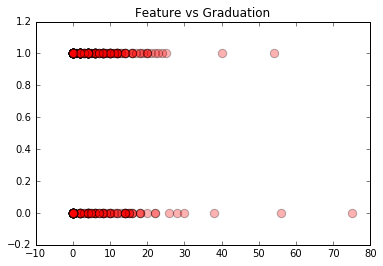

In [18]:
#played around with some further data exploration and visualization here. 
import pylab as pl
%matplotlib inline  

#ignore future warnings from matplotlib
import warnings
warnings.filterwarnings('ignore')

y_all_binary = y_all.replace(['yes', 'no'], [1, 0])
y_train_binary = y_train.replace(['yes', 'no'], [1, 0])

pl.figure()
pl.title('Feature vs Graduation')
pl.scatter(X_all['absences'], y_all_binary, c='r', s=70, alpha=0.3)
pl.show()

### Split data into training and test sets

So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.

In [11]:
#import train_test_split to do splitting
from sklearn.cross_validation import train_test_split

# First, decide how many training vs test samples you want
num_all = float(student_data.shape[0])  # same as len(student_data)
num_train = 300  # about 75% of the data
num_test = num_all - num_train

# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
def split_that_data(X_all, y_all, train_size, test_size):
    return train_test_split(X_all, y_all, train_size=train_size, test_size=test_size)

X_train, X_test, y_train, y_test = split_that_data(X_all, y_all, (num_train/num_all), (num_test/num_all))

print ("Training set: {} samples".format(X_train.shape[0]))
print ("Test set: {} samples".format(X_test.shape[0]))
# Note: If you need a validation set, extract it from within training data

Training set: 300 samples
Test set: 95 samples


## 4. Training and Evaluating Models
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?
- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.

## Model 1: Support Vector Machine - LinearSVC() 
<strong>Steps:</strong><br>
1. Train the model 
2. Calculate the F1 Score
3. Repeat with training sizes 100, 200 & 300 keeping testing set size = 95 

In [14]:
# Train a model
import time
from sklearn.metrics import accuracy_score
from sklearn import svm
    
def train_classifier(clf, X_train, y_train):
    print ("Training {}...".format(clf.__class__.__name__))
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print ("Done!\nTraining time (secs): {:.3f}".format(end - start))

# TODO: Choose a model, import it and instantiate an object
clf = svm.LinearSVC()

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print (clf)  # you can inspect the learned model by printing it

Training LinearSVC...
Done!
Training time (secs): 0.118
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [16]:
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

def predict_labels(clf, features, target, is_training=True):
    if is_training: 
        which_prediction = 'Training Set'
    else:
        which_prediction = 'Testing Set'
    print ("Predicting labels for {} using {}...".format(which_prediction, clf.__class__.__name__))
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print ("Done!\nPrediction time for {} (secs): {:.3f}".format(which_prediction ,end - start))
    return f1_score(target.values, y_pred, pos_label='yes')

train_f1_score = predict_labels(clf, X_train, y_train)
print ("F1 score for training set: {}".format(train_f1_score))

Predicting labels for Training Set using LinearSVC...
Done!
Prediction time for Training Set (secs): 0.005
F1 score for training set: 0.828025477707


In [24]:
# Function to train and compute F1 scores for iterative training sizes
def iterative_training_sizes(clf, training_sizes, test_size=95):
    '''Takes a classifier a list of training sizes and an optional test_size input.
       Trains, predicts and prints F1 scores for each training size. '''
    
    for size in training_sizes:
        print("The training size is {}.".format(size))
        
        #reshuffle and resplit the data 
        X_train, X_test, y_train, y_test = split_that_data(X_all, y_all, (size/num_all), (test_size/num_all))
        
        #train the classifier with new data 
        train_classifier(clf, X_train, y_train)
        
        #calculate f1 for train and test 
        f1_train = predict_labels(clf, X_train, y_train)
        f1_test = predict_labels(clf, X_test, y_test, False)
        
        print("Fl score for training data: {}".format(f1_train))  
        print("F1 score for test data: {}".format(f1_test)+"\n")

In [118]:
#Repeat the process with SVM with different training sizes 100, 200, 300
iterative_training_sizes(clf, [100, 200, 300])

The training size is 100.
Training LinearSVC...
Done!
Training time (secs): 0.022
Predicting labels for Training Set using LinearSVC...
Done!
Prediction time for Training Set (secs): 0.000
Predicting labels for Testing Set using LinearSVC...
Done!
Prediction time for Testing Set (secs): 0.001
Fl score for training data: 0.888888888889
F1 score for test data: 0.618181818182

The training size is 200.
Training LinearSVC...
Done!
Training time (secs): 0.057
Predicting labels for Training Set using LinearSVC...
Done!
Prediction time for Training Set (secs): 0.000
Predicting labels for Testing Set using LinearSVC...
Done!
Prediction time for Testing Set (secs): 0.001
Fl score for training data: 0.796812749004
F1 score for test data: 0.697247706422

The training size is 300.
Training LinearSVC...
Done!
Training time (secs): 0.077
Predicting labels for Training Set using LinearSVC...
Done!
Prediction time for Training Set (secs): 0.011
Predicting labels for Testing Set using LinearSVC...
Done

## Model 2: Naive Bayes - Guassian NB Classifier
<strong>Steps:</strong><br>
1. Train the model 
2. Calculate the F1 Score
3. Repeat with training sizes 100, 200 & 300 keeping testing set size = 95 

In [119]:
# Train the NB model 
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB() 

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print (clf)  # you can inspect the learned model by printing it

Training GaussianNB...
Done!
Training time (secs): 0.005
GaussianNB()


In [120]:
#predict training F1 score
train_f1_score = predict_labels(clf, X_train, y_train)
print ("F1 score for training set: {}".format(train_f1_score))

Predicting labels for Training Set using GaussianNB...
Done!
Prediction time for Training Set (secs): 0.002
F1 score for training set: 0.820143884892


In [95]:
#Repeat the process with SVM with different training sizes 100, 200, 300
iterative_training_sizes(clf, [100, 200, 300])

The training size is 100.
Training GaussianNB...
Done!
Training time (secs): 0.003
Predicting labels for Training Set using GaussianNB...
Done!
Prediction time for Training Set (secs): 0.001
Predicting labels for Testing Set using GaussianNB...
Done!
Prediction time for Testing Set (secs): 0.002
Fl score for training data: 0.298850574713
F1 score for test data: 0.329411764706

The training size is 200.
Training GaussianNB...
Done!
Training time (secs): 0.002
Predicting labels for Training Set using GaussianNB...
Done!
Prediction time for Training Set (secs): 0.001
Predicting labels for Testing Set using GaussianNB...
Done!
Prediction time for Testing Set (secs): 0.001
Fl score for training data: 0.791208791209
F1 score for test data: 0.765625

The training size is 300.
Training GaussianNB...
Done!
Training time (secs): 0.003
Predicting labels for Training Set using GaussianNB...
Done!
Prediction time for Training Set (secs): 0.002
Predicting labels for Testing Set using GaussianNB...
D

## Model 3: K Nearest Neighbors 
<strong>Steps:</strong><br>
1. Train the model 
2. Calculate the F1 Score
3. Repeat with training sizes 100, 200 & 300 keeping testing set size = 95 

In [96]:
# Train the KNN model 
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print (clf)  # you can inspect the learned model by printing it

Training KNeighborsClassifier...
Done!
Training time (secs): 0.004
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [77]:
#predict training F1 score
train_f1_score = predict_labels(clf, X_train, y_train)
print ("F1 score for training set: {}".format(train_f1_score))

Predicting labels for Training Set using KNeighborsClassifier...
Done!
Prediction time for Training Set (secs): 0.025
F1 score for training set: 0.862831858407


In [97]:
#Repeat the process with SVM with different training sizes 100, 200, 300
iterative_training_sizes(clf, [100, 200, 300])

The training size is 100.
Training KNeighborsClassifier...
Done!
Training time (secs): 0.001
Predicting labels for Training Set using KNeighborsClassifier...
Done!
Prediction time for Training Set (secs): 0.004
Predicting labels for Testing Set using KNeighborsClassifier...
Done!
Prediction time for Testing Set (secs): 0.005
Fl score for training data: 0.791946308725
F1 score for test data: 0.802721088435

The training size is 200.
Training KNeighborsClassifier...
Done!
Training time (secs): 0.002
Predicting labels for Training Set using KNeighborsClassifier...
Done!
Prediction time for Training Set (secs): 0.013
Predicting labels for Testing Set using KNeighborsClassifier...
Done!
Prediction time for Testing Set (secs): 0.007
Fl score for training data: 0.884615384615
F1 score for test data: 0.769230769231

The training size is 300.
Training KNeighborsClassifier...
Done!
Training time (secs): 0.003
Predicting labels for Training Set using KNeighborsClassifier...
Done!
Prediction time 

## 5. Choosing the Best Model

- Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?
- In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).
- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.
- What is the model's final F<sub>1</sub> score?

In [26]:
# TODO: Fine-tune your model and report the best F1 score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

classifier = svm.SVC()
parameters = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
scorer = make_scorer(f1_score) 

clf = GridSearchCV(classifier, parameters, scoring=scorer)
clf.fit(X_train, y_train_binary)

print ("***** FINAL MODEL *****")
print (clf.fit(X_train, y_train_binary), '\n')
print ("Best Kernel: {}".format(clf.best_params_))
print ("Best Score: {}".format(clf.best_score_))

***** FINAL MODEL *****
(GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, scoring=make_scorer(f1_score),
       verbose=0), '\n')
Best Kernel: {'kernel': 'rbf'}
Best Score: 0.810706980477


In [21]:
#evaluate training/prediction time with the results from GridSearchCV
clf = svm.SVC(kernel='rbf')

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print (clf) 

Training SVC...
Done!
Training time (secs): 0.028
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [22]:
#predict training F1 score
train_f1_score = predict_labels(clf, X_train, y_train)
print ("F1 score for training set: {}".format(train_f1_score))

Predicting labels for Training Set using SVC...
Done!
Prediction time for Training Set (secs): 0.021
F1 score for training set: 0.857142857143


In [25]:
#Repeat the process with SVM with different training sizes 100, 200, 300
iterative_training_sizes(clf, [100, 200, 300])

The training size is 100.
Training SVC...
Done!
Training time (secs): 0.004
Predicting labels for Training Set using SVC...
Done!
Prediction time for Training Set (secs): 0.002
Predicting labels for Testing Set using SVC...
Done!
Prediction time for Testing Set (secs): 0.003
Fl score for training data: 0.915492957746
F1 score for test data: 0.855263157895

The training size is 200.
Training SVC...
Done!
Training time (secs): 0.013
Predicting labels for Training Set using SVC...
Done!
Prediction time for Training Set (secs): 0.009
Predicting labels for Testing Set using SVC...
Done!
Prediction time for Testing Set (secs): 0.005
Fl score for training data: 0.877887788779
F1 score for test data: 0.82119205298

The training size is 300.
Training SVC...
Done!
Training time (secs): 0.028
Predicting labels for Training Set using SVC...
Done!
Prediction time for Training Set (secs): 0.022
Predicting labels for Testing Set using SVC...
Done!
Prediction time for Testing Set (secs): 0.006
Fl scor